# School Finances Dataset

In [2]:
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
import math
import csv
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('elsec15.csv')

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Understanding the Data

In [4]:
df.shape

(14376, 141)

In [5]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [6]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


What does our Matrix look like?

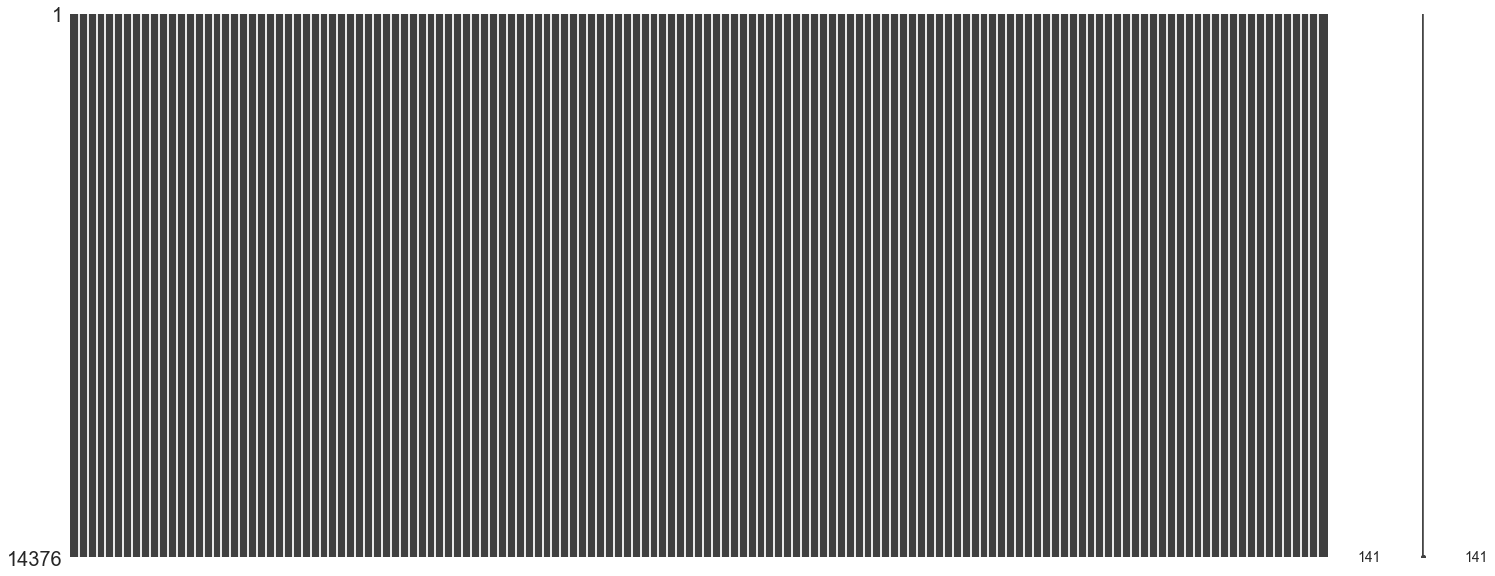

In [8]:
msno.matrix(df)

So all the data is here. However some columns have a lot of 0's. Lets see this

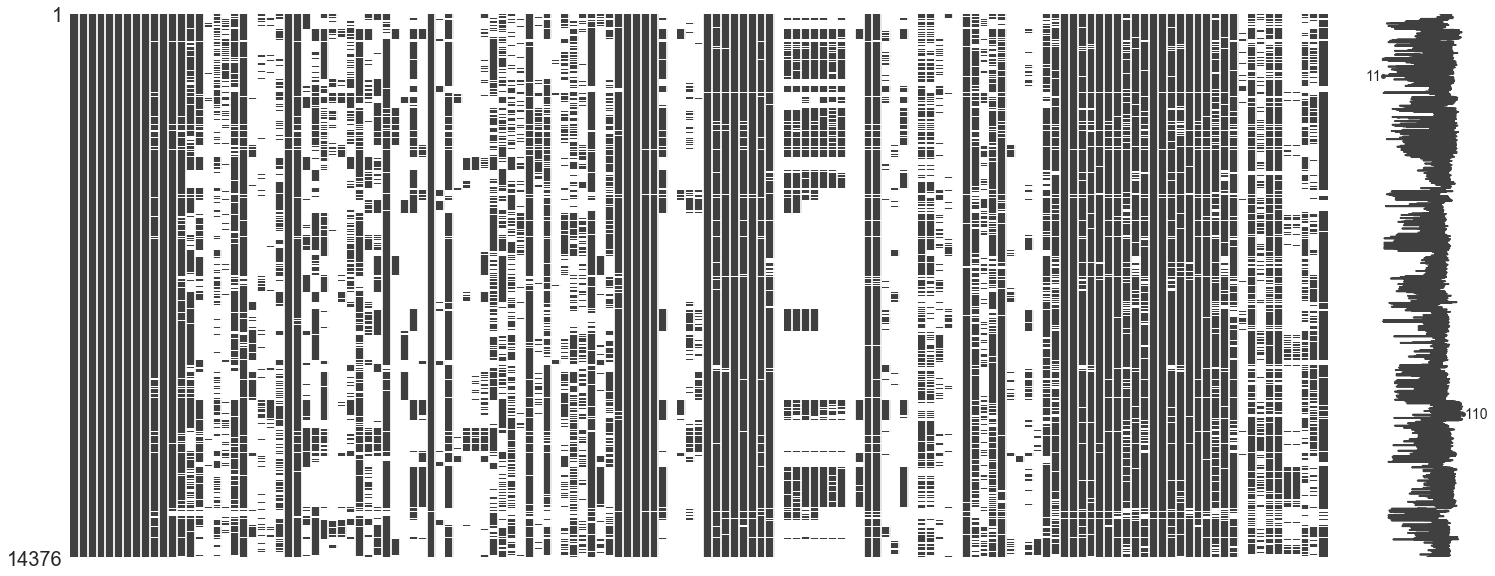

TypeError: 'tuple' object is not callable

In [11]:
df1 = df.replace(0, float("NAN"))
msno.matrix(df1)

So alot of the data is 0's. Lets see what the data looks like after removing columns have > 50% of their entries as 0's.

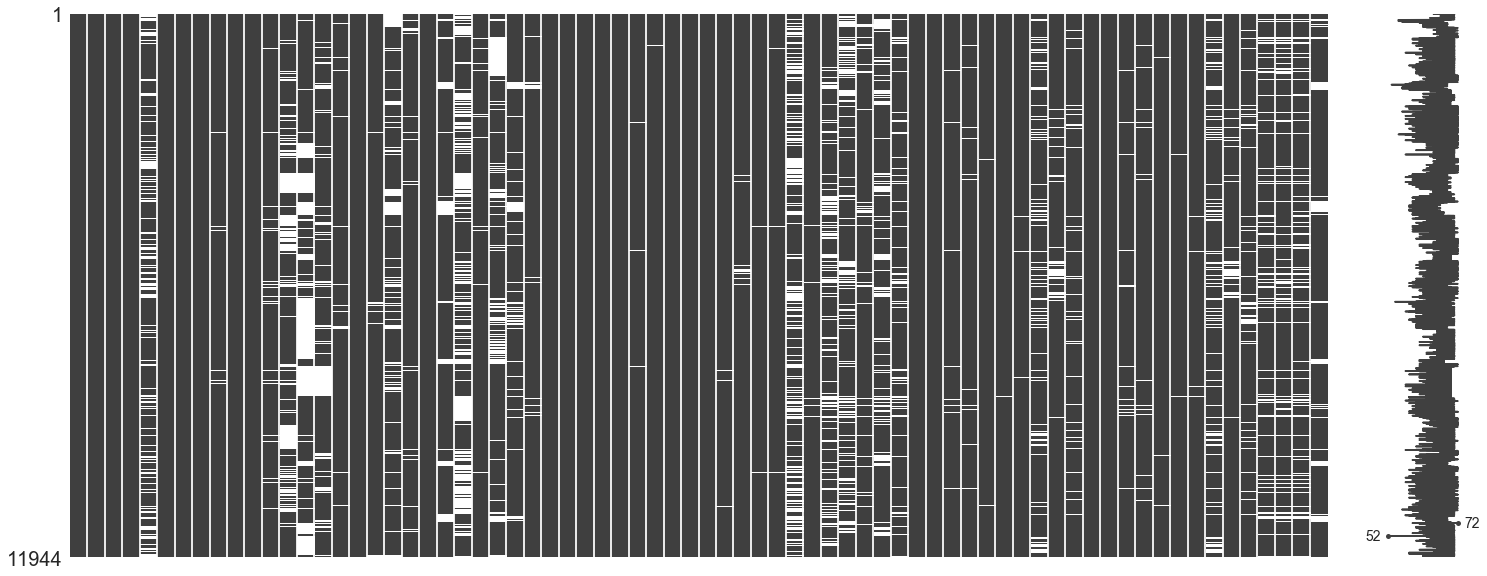

(11944, 72)
69 columns have more than 50% of their entries as 0's.


In [19]:
df1 = df1.dropna(axis=1,thresh=math.ceil(df.shape[0]/2), how='all')
msno.matrix(df1)
print("%s columns have more than 50%% of their entries as 0's." % str(df.shape[1] - df1.shape[1]))

So about half the columns have > 50% of their entries as zeroes. 

How many rows have > 50% of their entries as zeroes?

In [20]:
df1 = df.replace(0, float("NAN"))
df1 = df1.replace("N", float("NAN"))
df1 = df1.dropna(axis=0,thresh=math.ceil(df1.shape[1]/2), how='all')
print("%s rows have more than 50%% of their entries as 0's." % str(df.shape[0] - df1.shape[0]))

2432 rows have more than 50% of their entries as 0's.


In [21]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

## Cleaning the Data

We have decided to work only with the columns that have > 50 % of the rows as non-zero entries. We thought that if most of the columns are zero, there is not enough discrepancy in the data to make an interesting analysis.

In [22]:
df = df.replace(0, float("NAN"))
df = df.dropna(axis=1,thresh=math.ceil(df.shape[0]/2), how='all')
df = df.replace(float("NAN"), 0)

Additionally some of the data is not very useful to us. For example the census ID's. We have omitted these columns also.

In [27]:
df.drop("YRDATA", axis=1,inplace=True)     #Its all 2015
df.drop("IDCENSUS", axis=1, inplace=True)
df.drop("NCESID", axis=1, inplace=True)

No data is missing, so no data needs to be imputed. We made some mappings between column values and human understandable values, for understanding more of the data.

In [24]:
State_Dict = {1: 'AL', 2: 'AK', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'HA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS', 18: 'KY', 19: 'LA', 20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS', 26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY', 34: 'NC', 35: 'ND', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 40: 'RI', 41: 'SC', 42: 'SD', 43: 'TN', 44: 'TX', 45: 'UT', 46: 'VT', 47: 'VA', 48: 'WA', 49: 'WV', 50: 'WI', 51: 'WY'}

Col_To_English = {}
with open('School Data Labels.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        Col_To_English[row[0]] = row[1]

for key in Col_To_English:
    print("Code: ", key, "| Label: ",Col_To_English[key])

Code:  _19H | Label:  Long-term debt outstanding at beginning of the fiscal year
Code:  Z34 | Label:  Total employee benefit payments
Code:  A13 | Label:  District activity receipts
Code:  T06 | Label:  Property taxes
Code:  V24 | Label:  Total employee benefit payments - Student transportation
Code:  V11 | Label:  Total salaries and wages - Pupil support
Code:  C10 | Label:  School lunch programs
Code:  D11 | Label:  Revenue from other school systems
Code:  V14 | Label:  Total employee benefit payments - Instructional staff
Code:  C01 | Label:  General formula assistance
Code:  Z33 | Label:  Total salaries and wages - Instruction
Code:  V22 | Label:  Total employee benefit payments - Operation and maintenance of plant
Code:  V15 | Label:  Total salaries and wages - General administration
Code:  A09 | Label:  School lunch revenues
Code:  V40 | Label:  Current operation expenditure - Operation and maintenance of plant
Code:  TFEDREV | Label:  TOTAL ELEMENTARY-SECONDARY REVENUE
Code:  U9

## Visualizations

First lets look at the geographic distribution of our data

In [25]:
State_Dict = {1: 'AL', 2: 'AK', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'HA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS', 18: 'KY', 19: 'LA', 20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS', 26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY', 34: 'NC', 35: 'ND', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 40: 'RI', 41: 'SC', 42: 'SD', 43: 'TN', 44: 'TX', 45: 'UT', 46: 'VT', 47: 'VA', 48: 'WA', 49: 'WV', 50: 'WI', 51: 'WY'}
State_Rows = []
for key in State_Dict:
    mask = (df["STATE"] == key)
    States_Values = df[mask]
    count = mask.sum()
    # Corruption is a data value dealt with later
    corruption = (States_Values["V15"].sum() + States_Values["V16"].sum() + States_Values["V17"].sum() + States_Values["V18"].sum()) / (States_Values["Z32"].sum() + States_Values["Z34"].sum())
        
    mydict = {"State": State_Dict[key], "Count": count, "Corruption":corruption}
    State_Rows.append(mydict)
States = pd.DataFrame(State_Rows)

In [71]:
# GENERATES OUR NUMBER OF SCHOOLS PER STATE CHLOROPLETH
import plotly.plotly as py # Note you need to setup an API key for this to work. 
from plotly.graph_objs import *

scl = [[0.0, 'rgb(252,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = States['State'],
        z = States['Count'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Schools")
        ) ]
layout = Layout(
    autosize=False,
    geo=dict(
        countrycolor='rgb(102, 102, 102)',
        countrywidth=0.1,
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgba(237, 247, 138, 0.28)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=True,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102, 102)',
        subunitwidth=0.5
    ),
    hovermode='closest',
    images=list([
        dict(
            x=1,
            y=0.6,
            sizex=0.155,
            sizey=0.4,
            source='http://i.imgur.com/Xe3f1zg.png',
            xanchor='right',
            xref='paper',
            yanchor='bottom',
            yref='paper'
        )
    ]),
    showlegend=True,
    title='<b>Number of Schools per State</b>',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='DSD_1')

Now we are going to add a column which converts enrollment size to a categorical data type. Note that the average enrollment size is 693, according to https://nces.ed.gov/pubs2012/2012001.pdf, Page 170.

In [59]:
def group_pop(x): 
    if x >= 50000:
        return "Greater than 50,000"
    elif x < 50000 and x >= 10000:
        return "Greater than 9,999 and less than 50,000"
    elif x < 10000 and x >= 2000:
        return "Greater than 1999 and less than 10,000"
    elif x < 2000 and x >= 999:
        return "Greater than 999 and less than 2000"
    elif x < 1000 and x >= 499:
        return "Greater than 499 and less than 1000"
    elif x < 500 and x >= 99:
        return "Greater than 99 and less than 500"
    else:
        return "Less than 100"
    
df["Enrollment Size Class"] = df['V33'].map(group_pop)
df_pop_mean = df.groupby(df["Enrollment Size Class"]).count()
df_pop_sum = df.groupby(df["Enrollment Size Class"]).sum()
df_pop_count= df.sort_values("V33", ascending=True).groupby(df["Enrollment Size Class"]).count()


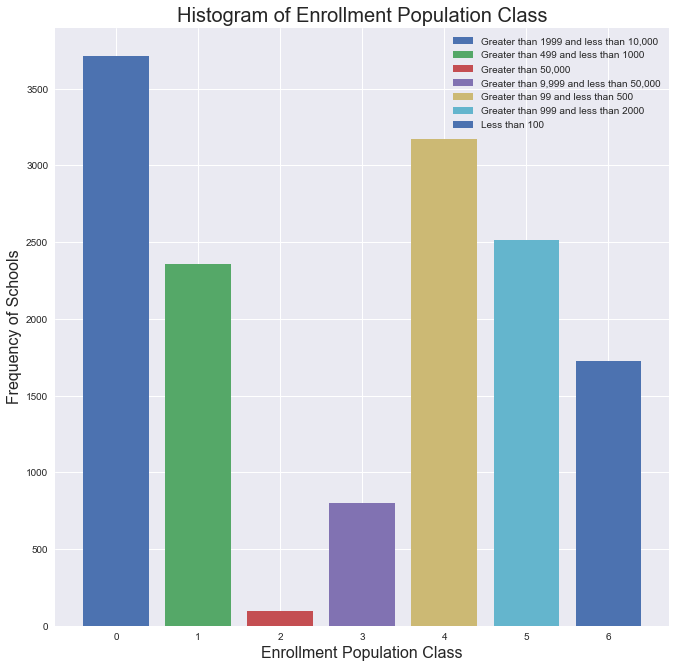

In [70]:
plt.figure(figsize=(11,11))


plt.xlabel('Enrollment Population Class', fontsize=16)
plt.ylabel('Frequency of Schools', fontsize=16)
plt.title('Histogram of Enrollment Population Class', fontsize=20)


for i in range(0,7):
    plt.bar(i, df_pop_count["Enrollment Size Class"][i], label = list(df_pop_sum.index)[i])
plt.legend()
plt.show()
plt.close()

It would be interesting to compare the enrollment population class to the distribution of total revenue for schools in that class, so that is shown in the following Violin Plot

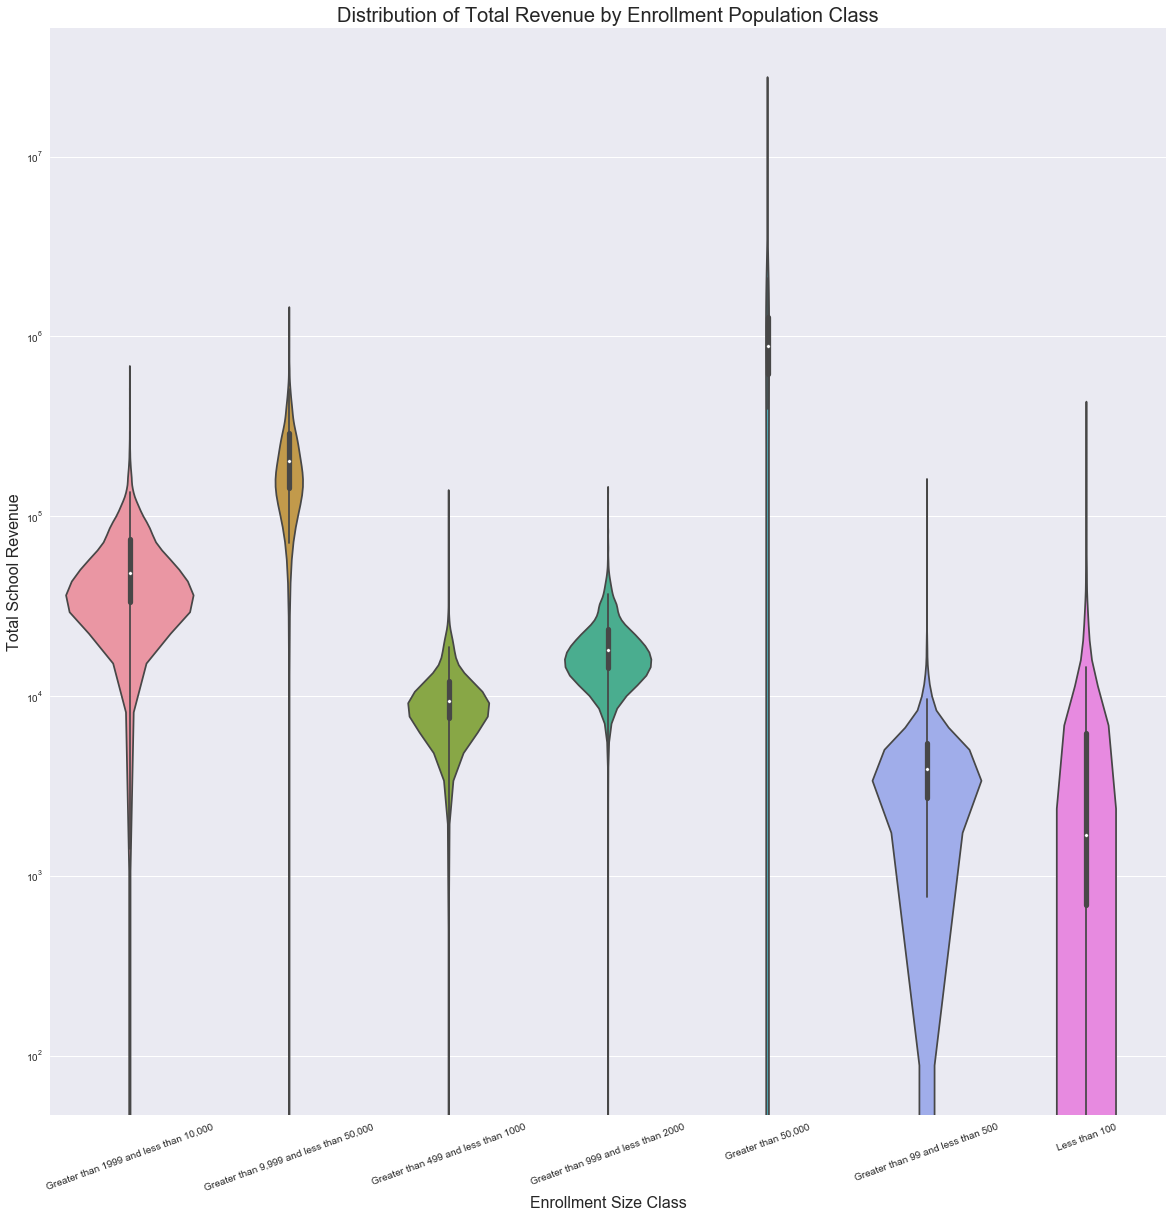

In [68]:
plt.figure(figsize=(20,20))
violinplot = sns.violinplot(x="Enrollment Size Class", y="TOTALREV", data=df,scale="count")
violinplot.axes.set_yscale('log') #Make axis readable
plt.title("Distribution of Total Revenue by Enrollment Population Class", fontsize=20)
plt.xticks(rotation=20)
plt.ylabel('Total School Revenue',fontsize= 16)
plt.xlabel('Enrollment Size Class',fontsize= 16)
plt.show()

Next lets look at the frequency of schools per property tax bracket.
We will split this up as based upon a normal distribution, using the standard deviation and mean provided by:
https://www.urban.org/sites/default/files/publication/24216/412959-Residential-Property-Taxes-in-the-United-States.PDF

Mean Property Tax: $2,430 

Standard Deviation: $1,599


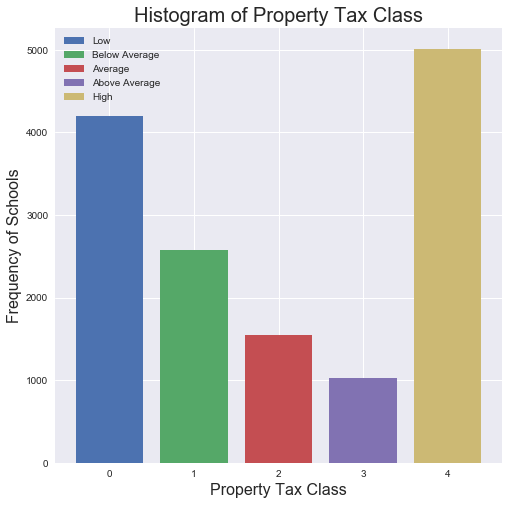

In [75]:
pt_mean = 2430
pt_sd = 1599

property_taxes = df["T06"].dropna()
bin_names = ["Low", "Below Average", "Average", "Above Average", "High"]
pt_bins = pd.cut(property_taxes, [pt_mean-2*pt_sd, pt_mean-1*pt_sd, pt_mean, pt_mean+1*pt_sd, pt_mean+2*pt_sd, float("infinity")], labels = bin_names)

pt_taxes = pd.DataFrame(property_taxes.groupby(pt_bins).count())
df["Property Tax Class"] = pt_bins
plt.figure(figsize=(8,8))

plt.xlabel('Property Tax Class', fontsize=16)
plt.ylabel('Frequency of Schools', fontsize = 16)
plt.title('Histogram of Property Tax Class', fontsize = 20)

for i in range(0,5):
    plt.bar(i, pt_taxes["T06"][i], label = list(pt_taxes.index)[i])
plt.legend()
plt.show()
plt.close()

Next we will look at the distribution of schools by intstructional spending per student.

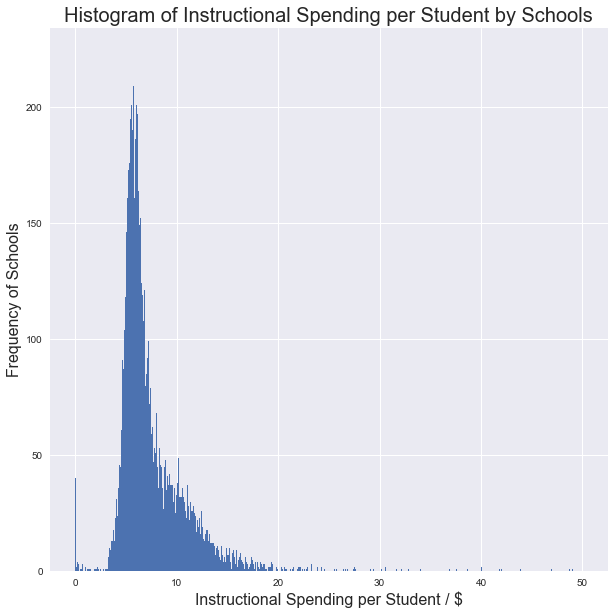

In [87]:
df["Instructional spending per student"] = df["TCURINST"]/df[df["V33"] != 0]['V33']
plt.figure(1, figsize=(10,10))
plt.xlabel('Instructional Spending per Student / $', fontsize = 16)
plt.ylabel('Frequency of Schools', fontsize = 16)
plt.title('Histogram of Instructional Spending per Student by Schools', fontsize = 20)
df["Instructional spending per student"].hist(range=[0, 50], bins = 1000)
plt.show()
plt.close()

We'll build 3 models using simple linear regression

Model 1: Regressing on Property Taxes vs Federal Title 1 Funding (Disadvantaged Students)

Model 2: Regressing on Property Taxes vs Instructional Spending

Model 3: Regressing on Property Taxes vs Outstanding Debt at the start of the fiscal yea

In [88]:
# Remove outlier property taxes and 0 property taxes. 
df_reg = df.copy()
df_reg = df_reg[(np.abs(stats.zscore(df_reg["T06"])) < 3) & (df_reg["T06"] != 0)]

taxes = df_reg["T06"]
title1 = df_reg["C14"]
spending = df_reg["TCURINST"]
debt = df_reg["_19H"]

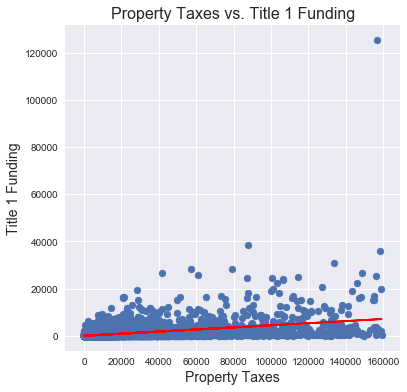

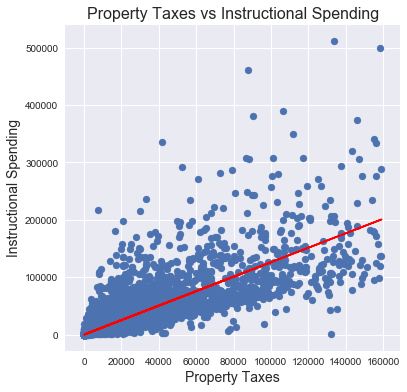

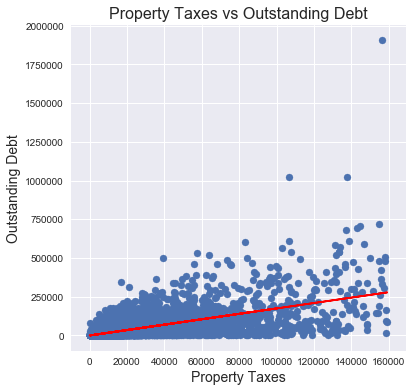

In [91]:
plt.figure(1, figsize=(6,6))
myOLS_title1 = sm.OLS(title1,taxes).fit()
plt.plot(taxes, myOLS_title1.predict(taxes), color = 'red')
plt.scatter(taxes,title1)
plt.title("Property Taxes vs. Title 1 Funding", fontsize= 16)
plt.xlabel("Property Taxes", fontsize= 14)
plt.ylabel("Title 1 Funding", fontsize= 14)
plt.show()
plt.close()

plt.figure(2, figsize=(6,6))
myOLS_spending = sm.OLS(spending,taxes).fit()
plt.plot(taxes, myOLS_spending.predict(taxes), color = 'red')
plt.scatter(taxes,spending)
plt.title("Property Taxes vs Instructional Spending", fontsize= 16)
plt.xlabel("Property Taxes", fontsize= 14)
plt.ylabel("Instructional Spending", fontsize= 14)
plt.show()
plt.close()

plt.figure(3, figsize = (6,6))
myOLS_debt = sm.OLS(debt, taxes).fit()
plt.plot(taxes, myOLS_debt.predict(taxes), color = 'red')
plt.scatter(taxes,debt)
plt.title("Property Taxes vs Outstanding Debt", fontsize= 16)
plt.xlabel("Property Taxes", fontsize= 14)
plt.ylabel("Outstanding Debt", fontsize= 14)
plt.show()
plt.close()

In [92]:
# Partitioning validation and training data

taxes.shape
train_num = int(np.round(taxes.shape[0]*.8))

taxes_train = taxes[0:train_num]
taxes_valid = taxes[train_num:]
title1_train = title1[0:train_num]
title1_valid = title1[train_num:]
spending_train = spending[0:train_num]
spending_valid = spending[train_num:]
debt_train = debt[0:train_num]
debt_valid = debt[train_num:]

In [96]:
myOLS = sm.OLS(title1_train,taxes_train).fit()
title1_hat = myOLS.predict(taxes_valid)
title1_mse = 1/len(title1_valid)*np.dot((title1_valid - title1_hat),(title1_valid - title1_hat))
print("The MSE for the model taxes~title1 is:  ", title1_mse)
myOLS = sm.OLS(spending_train,taxes_train).fit()
spending_hat = myOLS.predict(taxes_valid)
spending_mse = 1/len(spending_valid)*np.dot((spending_valid - spending_hat),(spending_valid - spending_hat))
print("The MSE for the model taxes~spending is:", spending_mse)
myOLS = sm.OLS(debt_train,taxes_train).fit()
debt_hat = myOLS.predict(taxes_valid)
debt_mse = 1/len(debt_valid)*np.dot((debt_valid - debt_hat),(debt_valid - debt_hat))
print("The MSE for the model taxes~debt is:    ", debt_mse)

The MSE for the model taxes~title1 is:   2050414.15614
The MSE for the model taxes~spending is: 282908769.491
The MSE for the model taxes~debt is:     2616542250.57


Of the three models it looks like property tax best predicts instructional spending.

Let's use recursive feature selection to help us find even better indicators of instructional spending.
*To be filled in*

As a fun conclusion, we made a corruption index, which is defined for a set of data as:
$$\frac{\sum_{i=0}^{\# rows} "Salaries\ and\ employee\ benefits\ for\ general\ and\ school\ administration"}{\sum_{i=0}^{\# rows} "Total\ Revenue"}$$
This is defined as corruption as this money is going into to the pockets of the school administrators, and not the school teachers or students. 

In [98]:
# GENERATES OUR CORRUPTION INDEX PER STATE CHLOROPETH
import plotly.plotly as py
from plotly.graph_objs import *

scl = [[0.0, 'rgb(0,255,0)'],[1.0, 'rgb(188,0,0)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = States['State'],
        z = States['Corruption'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Corruption Index")
        ) ]
layout = Layout(
    autosize=False,
    geo=dict(
        countrycolor='rgb(102, 102, 102)',
        countrywidth=0.1,
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgba(237, 247, 138, 0.28)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=True,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102, 102)',
        subunitwidth=0.5
    ),
    hovermode='closest',
    images=list([
        dict(
            x=1,
            y=0.6,
            sizex=0.155,
            sizey=0.4,
            source='http://i.imgur.com/Xe3f1zg.png',
            xanchor='right',
            xref='paper',
            yanchor='bottom',
            yref='paper'
        )
    ]),
    showlegend=True,
    title='<b>Corruption Index per state</b>',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='DSD_2')

It appears that Missisippi and Oklahoma have the most corruption in their school boards. 10% of their revenue is going towards the school administrators. 
*Please note that this metric is just for fun and should not be taken seriously. There are issues in measuring corruption this way, since schools need administrators in order to run.*